### Efficient K-Means Clustering of randomly sampled input data

In [279]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linear_sum_assignment

# Hyperparameters
num_gaussians = 5
variance_factor = 150
num_samples_per_gaussian = 1000
clustering_iterations = 5

def plot_points(data_list):
    plt.figure()
    for d in data_list:
        x, y = list(zip(*d))
        plt.scatter(x, y)
    plt.show()

def avg_min_distance(preds, actual):
    distances = np.linalg.norm(preds[:, np.newaxis, :] - actual, axis=2)
    row_ind, col_ind = linear_sum_assignment(distances)
    return np.mean(distances[row_ind, col_ind])

#### Sample and Display the Ground Truth Distribution

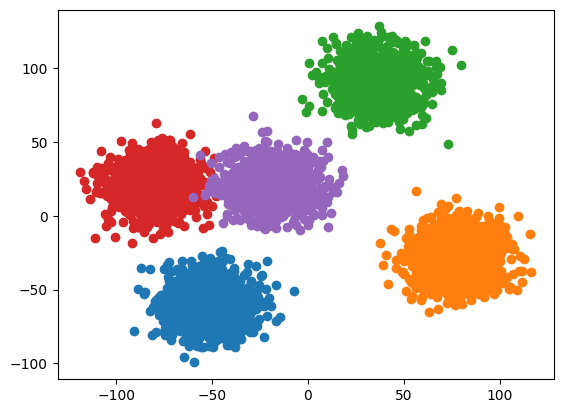

[[-51.12069697 -59.74959879]
 [ 78.7234892  -28.80998753]
 [ 36.35247367  91.0689145 ]
 [-80.5368917   21.06575808]
 [-19.25927238  20.66965422]]


In [280]:
gt_centers = np.random.uniform(-100, 100, size=(num_gaussians, 2))
sigma = np.eye(2)*variance_factor

data = []
gt_plot_data = []
for gt_center in gt_centers:
    # Generate 1000 samples from each of N 2D gaussians
    new_data = np.random.multivariate_normal(gt_center, sigma, num_samples_per_gaussian)
    data.extend(new_data)
    gt_plot_data.append(new_data)
data = np.array(data)
plot_points(gt_plot_data)
print(gt_centers)

#### K-Means Clustering Algorithm

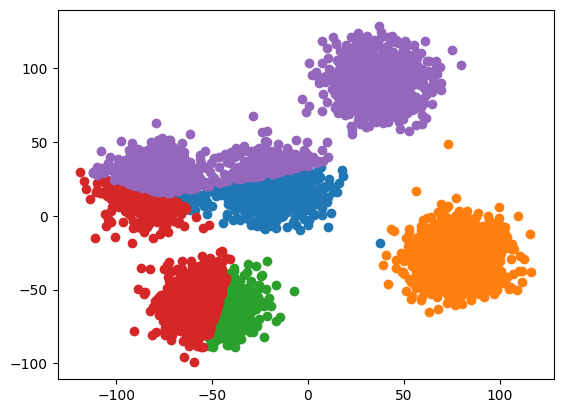

Centroids:  [[-21.00647766  15.60565903]
 [ 78.37569713 -28.39775619]
 [-39.28067554 -62.55997585]
 [-68.19550442 -33.69660991]
 [ -9.10530054  62.78940903]]
Mean estimate Error:  25.547480345207


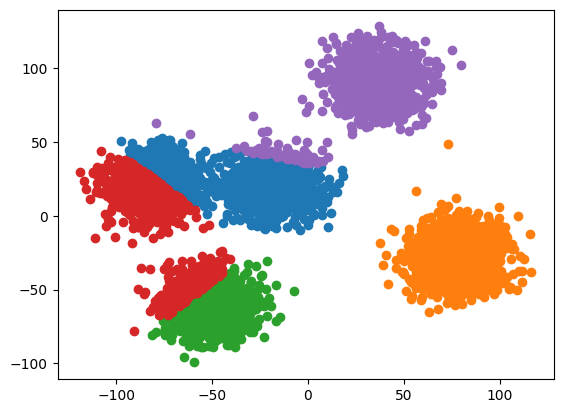

Centroids:  [[-35.6902055   22.77562217]
 [ 78.33471931 -28.38802106]
 [-47.79465642 -62.56271493]
 [-79.87340609  -2.11009826]
 [ 33.15734099  88.25465246]]
Mean estimate Error:  9.787685714157673


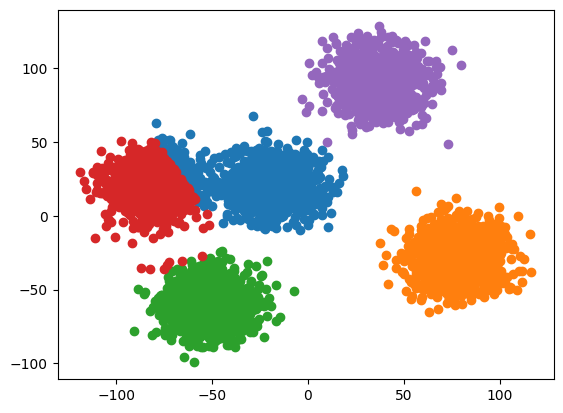

Centroids:  [[-23.97382114  22.42259511]
 [ 78.33978396 -28.46519425]
 [-51.04685073 -59.51979032]
 [-82.80203229  19.16683376]
 [ 36.42032457  91.14957474]]
Mean estimate Error:  1.7696674144578517


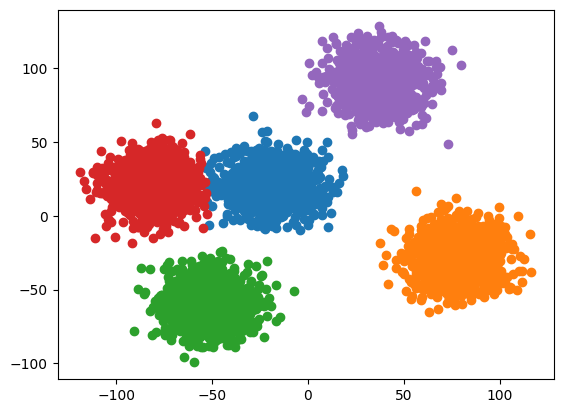

Centroids:  [[-19.40485037  21.42850784]
 [ 78.33978396 -28.46519425]
 [-51.20064324 -59.33384677]
 [-80.71649039  20.94397466]
 [ 36.44674436  91.1906663 ]]
Mean estimate Error:  0.4165795550768435


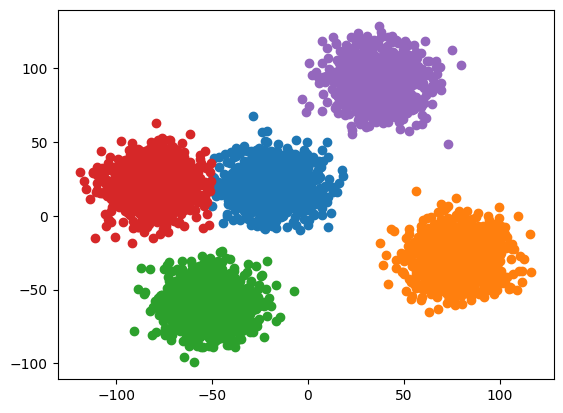

Centroids:  [[-19.04553344  21.40602694]
 [ 78.33978396 -28.46519425]
 [-51.20064324 -59.33384677]
 [-80.40120316  20.97158505]
 [ 36.44674436  91.1906663 ]]
Mean estimate Error:  0.4050286289935089


In [281]:
# Initialize random n points as centroids.
centroids = data[np.random.choice(data.shape[0], size=num_gaussians, replace=False)]
final_info = []
for _ in range(clustering_iterations):
    dists_to_centroids = np.array([])
    distances = np.linalg.norm(data[:, np.newaxis, :] - centroids, axis=2)
    closest_centroid_indices = np.argmin(distances, axis=1)
    new_centroids = []
    data_to_plot = []
    for k in range(centroids.shape[0]):
        new_centroids.append(data[closest_centroid_indices == k].mean(axis=0))
        data_to_plot.append(data[closest_centroid_indices == k])
    plot_points(data_to_plot)
    centroids = np.array(new_centroids)
    error = avg_min_distance(centroids, gt_centers)
    print("Centroids: ", centroids)
    print("Mean estimate Error: ", error)
    final_info = {"data_to_plot": data_to_plot, "centroids": centroids, "error": error}

#### Final Output

Final Centroids:  [[-19.04553344  21.40602694]
 [ 78.33978396 -28.46519425]
 [-51.20064324 -59.33384677]
 [-80.40120316  20.97158505]
 [ 36.44674436  91.1906663 ]]
Final Mean estimate Error:  0.4050286289935089


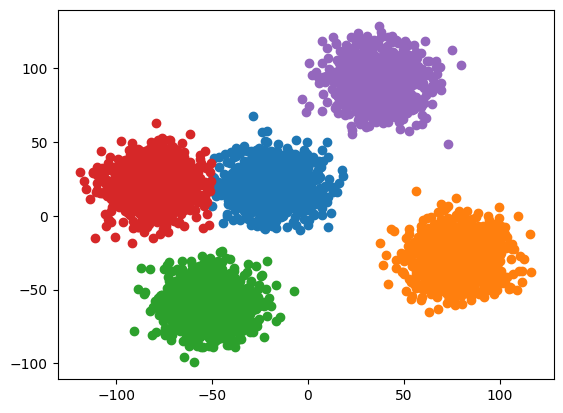

In [282]:
# Final Answer
print("Final Centroids: ", final_info['centroids'])
print("Final Mean estimate Error: ", final_info['error'])
plot_points(final_info['data_to_plot'])
